In [ ]:
from google.colab import files
uploaded = files.upload()  # upload fer2013.zip


Saving fer2013.zip to fer2013.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("fer2013.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")


In [ ]:
print(os.listdir('/content/'))

['.config', 'test', 'train', 'fer2013.zip', 'sample_data']


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 104s 229ms/step - accuracy: 0.2437 - loss: 1.8155 - val_accuracy: 0.3181 - val_loss: 1.6710
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.3081 - loss: 1.7146 - val_accuracy: 0.4032 - val_loss: 1.5391
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 104s 232ms/step - accuracy: 0.3570 - loss: 1.6405 - val_accuracy: 0.4298 - val_loss: 1.4895
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 101s 226ms/step - accuracy: 0.3848 - loss: 1.5842 - val_accuracy: 0.4524 - val_loss: 1.4378
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 104s 231ms/step - accuracy: 0.3981 - loss: 1.5469 - val_accuracy: 0.4535 - val_loss: 1.4129
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 99s 221ms/step - accuracy: 0.4088 - loss: 1.5190 - val_accuracy: 0.4780 - val_loss: 1.3723
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 101s 225ms/step - accuracy: 0.4233 - loss: 1.5001 - val_accuracy: 0.4802 - val_loss:

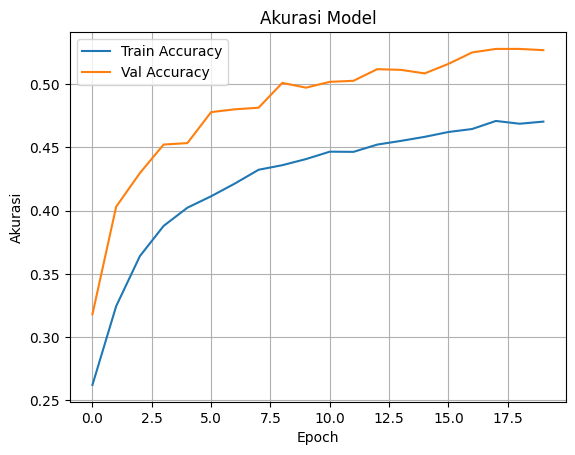

In [ ]:
# 1. Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# 2. Load Dataset dari Kaggle atau direktori lokal (upload manual via Colab)
# Misalnya simpan dalam folder: /content/
train_dir = '/content/train'
val_dir = '/content/test' # Assuming test folder is used for validation
test_dir = '/content/test' # Assuming test folder is used for testing

# 3. Preprocessing dengan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(48, 48),
                                                    color_mode='grayscale',
                                                    batch_size=64,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(48, 48),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical')

# 4. Membangun CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Training
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20)

# 6. Visualisasi Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.grid()
plt.show()